<a href="https://colab.research.google.com/github/YusukeAoki57/diveintocode-ml/blob/master/week3_%E6%8E%88%E6%A5%AD%E5%89%8D%E8%AA%B2%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


問題1 データの取得

In [3]:
iris=load_iris()

In [4]:
x=pd.DataFrame(iris.data,columns=iris.feature_names)

In [5]:
print(x)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [6]:
y=pd.DataFrame(iris.target)
y.columns=['Species']

In [7]:
print(y)

     Species
0          0
1          0
2          0
3          0
4          0
..       ...
145        2
146        2
147        2
148        2
149        2

[150 rows x 1 columns]


問題2　データの結合

In [8]:
df=pd.merge(x,y,left_index=True, right_index=True)

In [9]:
print(df)

     sepal length (cm)  sepal width (cm)  ...  petal width (cm)  Species
0                  5.1               3.5  ...               0.2        0
1                  4.9               3.0  ...               0.2        0
2                  4.7               3.2  ...               0.2        0
3                  4.6               3.1  ...               0.2        0
4                  5.0               3.6  ...               0.2        0
..                 ...               ...  ...               ...      ...
145                6.7               3.0  ...               2.3        2
146                6.3               2.5  ...               1.9        2
147                6.5               3.0  ...               2.0        2
148                6.2               3.4  ...               2.3        2
149                5.9               3.0  ...               1.8        2

[150 rows x 5 columns]


問題4 データの確認

In [10]:
#先頭から4行目までを表示
print(df[:4])

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  Species
0                5.1               3.5  ...               0.2        0
1                4.9               3.0  ...               0.2        0
2                4.7               3.2  ...               0.2        0
3                4.6               3.1  ...               0.2        0

[4 rows x 5 columns]


In [11]:
#ラベルごとのサンプル数の合計を出力する
print(df['Species'].value_counts())

2    50
1    50
0    50
Name: Species, dtype: int64


In [12]:
#特徴量に欠損値があるかを確認する
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [13]:
#特徴量の平均値と標準偏差、四分位数を一度に表示させる
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


問題4 irisデータセット自体の調査

In [14]:
#調査結果
"""
英国の統計学者で生物学者ロナルド・フィッシャーが、1936年の論文で導入した分類学で利用する線形判別分析のデータセット
3種のうちの2種は、同じ日に、同じ牧草地、同じ装置で、同じ人が、同時に採取、測定したもの
データセットは、Iris（Iris setosa、Iris virginica、およびIris versicolor）の3種のそれぞれの50サンプルからなる
各サンプルから4つの特徴である、がく（萼）と花弁（花びら）の長さと幅を測定した
これらの4つの特徴の組み合わせに基づいて、フィッシャーは種を互いに区別するための線形判別モデルを開発
"""

'\n英国の統計学者で生物学者ロナルド・フィッシャーが、1936年の論文で導入した分類学で利用する線形判別分析のデータセット\n3種のうちの2種は、同じ日に、同じ牧草地、同じ装置で、同じ人が、同時に採取、測定したもの\nデータセットは、Iris（Iris setosa、Iris virginica、およびIris versicolor）の3種のそれぞれの50サンプルからなる\n各サンプルから4つの特徴である、がく（萼）と花弁（花びら）の長さと幅を測定した\nこれらの4つの特徴の組み合わせに基づいて、フィッシャーは種を互いに区別するための線形判別モデルを開発\n'

問題5 必要なデータを抽出

In [15]:
#sepal_widthの列を３つの異なる方法で抽出する。locとilocはラベル名で指定するか、数値で指定するかが異なる
feature1 = df.loc[:, 'sepal width (cm)'] #locの使用→列はラベル名を指定
print(feature1)
feature2 =df.iloc[:, 1] #ilocの使用→列は数字を指定
print(feature2)
feature3 =df.at[0,'sepal width (cm)'] #atの使用→列はラベル名を指定。複数行は抽出不可で、1行のみ可能
print(feature3)

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64
3.5


In [16]:
#50番目から99番目までのデータを抽出する
feature4 =df.iloc[50:100,:] 
print(feature4)

    sepal length (cm)  sepal width (cm)  ...  petal width (cm)  Species
50                7.0               3.2  ...               1.4        1
51                6.4               3.2  ...               1.5        1
52                6.9               3.1  ...               1.5        1
53                5.5               2.3  ...               1.3        1
54                6.5               2.8  ...               1.5        1
55                5.7               2.8  ...               1.3        1
56                6.3               3.3  ...               1.6        1
57                4.9               2.4  ...               1.0        1
58                6.6               2.9  ...               1.3        1
59                5.2               2.7  ...               1.4        1
60                5.0               2.0  ...               1.0        1
61                5.9               3.0  ...               1.5        1
62                6.0               2.2  ...               1.0  

In [17]:
#petal_lengthの列の50番目から99番目までのデータを抽出する
feature5 =df.iloc[50:100,2]
print(feature5) 

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0
90    4.4
91    4.6
92    4.0
93    3.3
94    4.2
95    4.2
96    4.2
97    4.3
98    3.0
99    4.1
Name: petal length (cm), dtype: float64


In [18]:
#petal_widthの値が0.2のデータを抽出する
feature5=df[df['petal width (cm)']==0.2]
print(feature5)

    sepal length (cm)  sepal width (cm)  ...  petal width (cm)  Species
0                 5.1               3.5  ...               0.2        0
1                 4.9               3.0  ...               0.2        0
2                 4.7               3.2  ...               0.2        0
3                 4.6               3.1  ...               0.2        0
4                 5.0               3.6  ...               0.2        0
7                 5.0               3.4  ...               0.2        0
8                 4.4               2.9  ...               0.2        0
10                5.4               3.7  ...               0.2        0
11                4.8               3.4  ...               0.2        0
14                5.8               4.0  ...               0.2        0
20                5.4               3.4  ...               0.2        0
22                4.6               3.6  ...               0.2        0
24                4.8               3.4  ...               0.2  

問題6 図の作成

([<matplotlib.patches.Wedge at 0x7f3329596e48>,
 [Text(0.5499999702695115, 0.9526279613277875, 'setona'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'virgiclor'),
  Text(0.5500001486524352, -0.9526278583383436, 'virginica')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.3%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.3%'),
  Text(0.30000008108314646, -0.5196151954572783, '33.3%')])

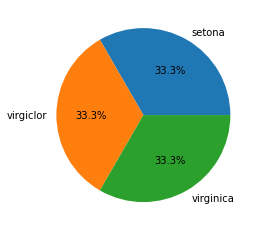

In [19]:
df_species=df['Species']

#print(df_species)

setona=(df_species==0).sum()/150
#print(setona)

virgiclor=(df_species==1).sum()/150
#print(virgiclor)

virginica=(df_species==2).sum()/150
#print(virginica)

# 円グラフを描画
plt.pie([setona,virgiclor,virginica],labels=['setona','virgiclor','virginica'],autopct="%1.1f%%")

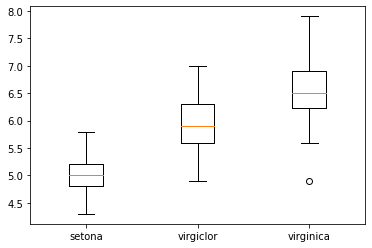

In [39]:
#箱ひげ図
fig, ax = plt.subplots()
setona_value = df[['Species', 'sepal length (cm)']].query('Species ==0')
virgiclor_value=df[['Species', 'sepal length (cm)']].query('Species ==1')
virginica_value=df[['Species', 'sepal length (cm)']].query('Species ==2')

points=(setona_value.iloc[:,1],virgiclor_value.iloc[:,1],virginica_value.iloc[:,1])

bp = ax.boxplot(points)
ax.set_xticklabels(['setona','virgiclor','virginica'])
plt.show()

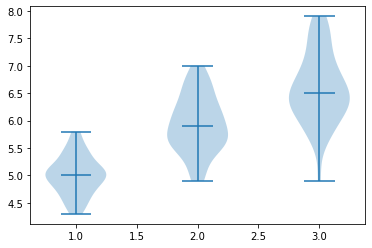

In [40]:
#バイオリン図
plt.violinplot(points, showmedians=True)
plt.show()

問題7 特徴量間の関係の確認

Text(0.5, 1.0, 'Sepal')

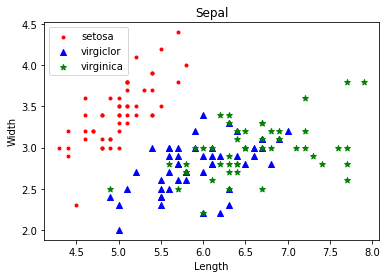

In [44]:
#縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る(６つ)
setona_value2 = df[['Species', 'sepal width (cm)']].query('Species ==0')
virgiclor_value2=df[['Species', 'sepal width (cm)']].query('Species ==1')
virginica_value2=df[['Species', 'sepal width (cm)']].query('Species ==2')

setona_value3 = df[['Species', 'petal length (cm)']].query('Species ==0')
virgiclor_value3=df[['Species', 'petal length (cm)']].query('Species ==1')
virginica_value3=df[['Species', 'petal length (cm)']].query('Species ==2')

setona_value4 = df[['Species', 'petal width (cm)']].query('Species ==0')
virgiclor_value4=df[['Species', 'petal width (cm)']].query('Species ==1')
virginica_value4=df[['Species', 'petal width (cm)']].query('Species ==2')


#Sepalのlengthとwidth
plt.scatter(setona_value.iloc[:,1],setona_value2.iloc[:,1],color='red',marker='.', label='setosa')
plt.scatter(virgiclor_value.iloc[:,1],virgiclor_value2.iloc[:,1],color='blue',marker='^', label='virgiclor')
plt.scatter(virginica_value.iloc[:,1],virginica_value2.iloc[:,1],color='green',marker='*', label='virginica')
plt.legend(loc='upper left')
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Sepal')

Text(0.5, 1.0, 'Petal')

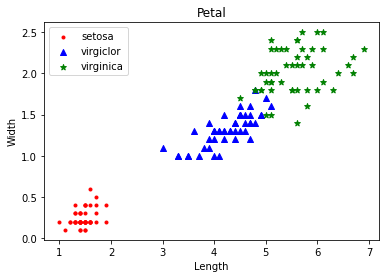

In [45]:
#Petalのlengthとwidth
plt.scatter(setona_value3.iloc[:,1],setona_value4.iloc[:,1],color='red',marker='.', label='setosa')
plt.scatter(virgiclor_value3.iloc[:,1],virgiclor_value4.iloc[:,1],color='blue',marker='^', label='virgiclor')
plt.scatter(virginica_value3.iloc[:,1],virginica_value4.iloc[:,1],color='green',marker='*', label='virginica')
plt.legend(loc='upper left')
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Petal')


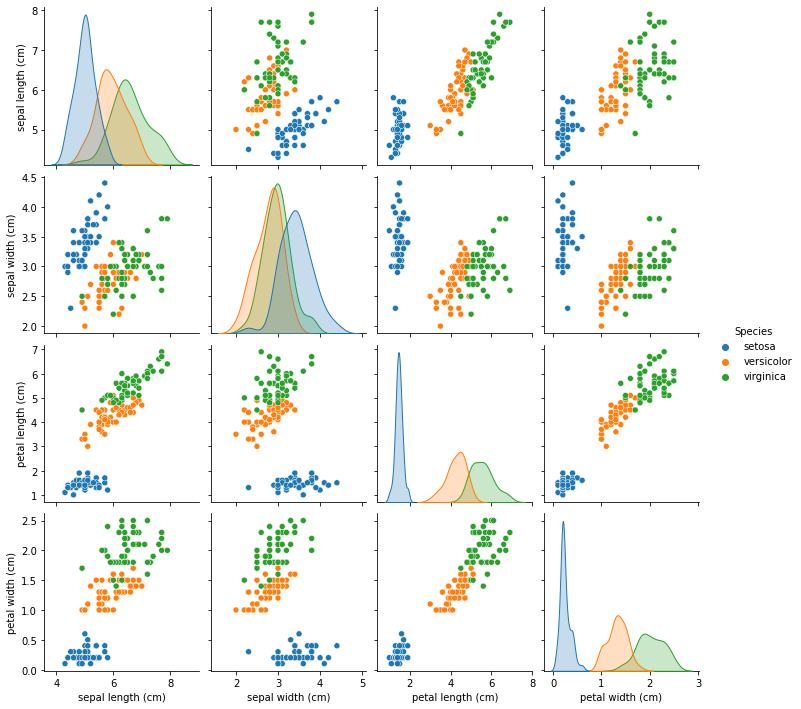

In [50]:
#全ての組み合わせの散布図を一度に表示させる、散布図行列を作る(１つ)

import seaborn as sns
import numpy as np

df['Species'] = np.array([iris.target_names[i] for i in iris.target])
sns.pairplot(df, hue='Species');

[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


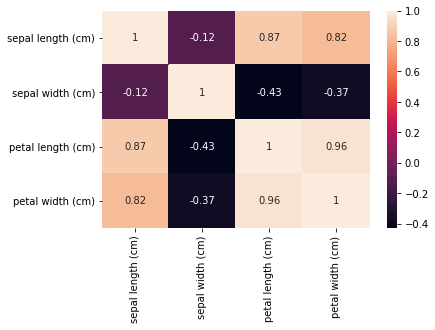

In [59]:
#４つの特徴量に関する相関係数行列を作る
cor=np.corrcoef([df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], df.iloc[:, 3]])
print(cor)


#ヒートマップ
feature_names=iris.feature_names

sns.heatmap(cor, annot=True,
            xticklabels=feature_names,
            yticklabels=feature_names)

問題8 可視化したグラフや表の結果の説明

In [ ]:
"""
・ヒートマップより、sepal lengthとsepal widthより、sepallengthとpetalの相関が高いことが読み取れる
・また、petal lengthとwidthaは強い相関がある一方、sepal lengthとwidthには相関があまり見られない
・そこで、散布図を見ると、petalの方の傾向はやはり顕著で、lengthとwidthに強い相関があるように見受けられる
・なお、散布図より、petalにおいて、setosaはlengthとwidthが最も低く、virginicaは双方最も高い